In [1]:
# import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv') #df is equal to dataframes
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df. head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [7]:
df = df.drop_duplicates(keep=False)

In [8]:
print("There are",df.duplicated().sum(),"duplicated rows" )

There are 0 duplicated rows


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# Checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

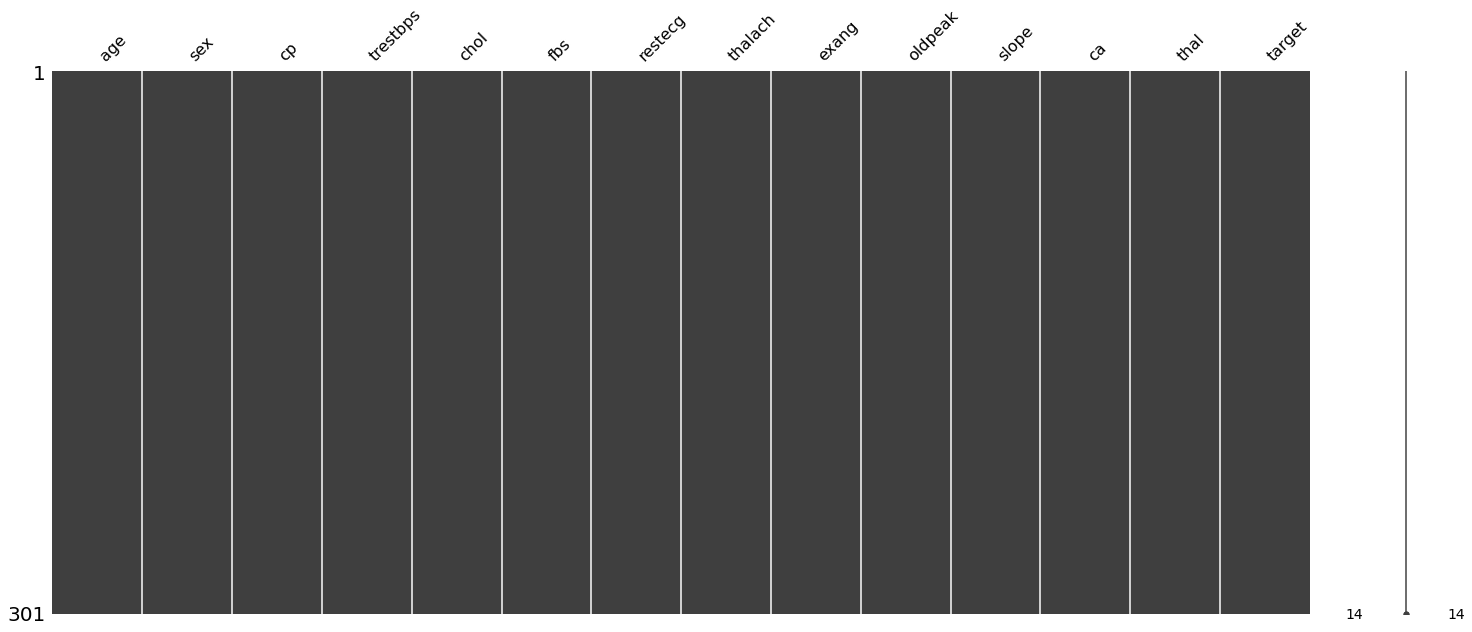

In [11]:
import missingno as msno
msno.matrix(df) # check the missing data visually using this package which presents rows and columns 

In [12]:
# Percentage of missing values per column
pd.Series(df["sex"]).value_counts(normalize=True).sort_index()

0    0.318937
1    0.681063
Name: sex, dtype: float64

# Univariate analysis

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.581395,246.737542,0.149502,0.524917,149.491694,0.328904,1.046512,1.395349,0.707641,2.315615,0.541528
std,9.013150,0.466841,1.032023,17.588752,51.674503,0.357176,0.526191,22.901618,0.470597,1.161822,0.616316,0.990408,0.613777,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

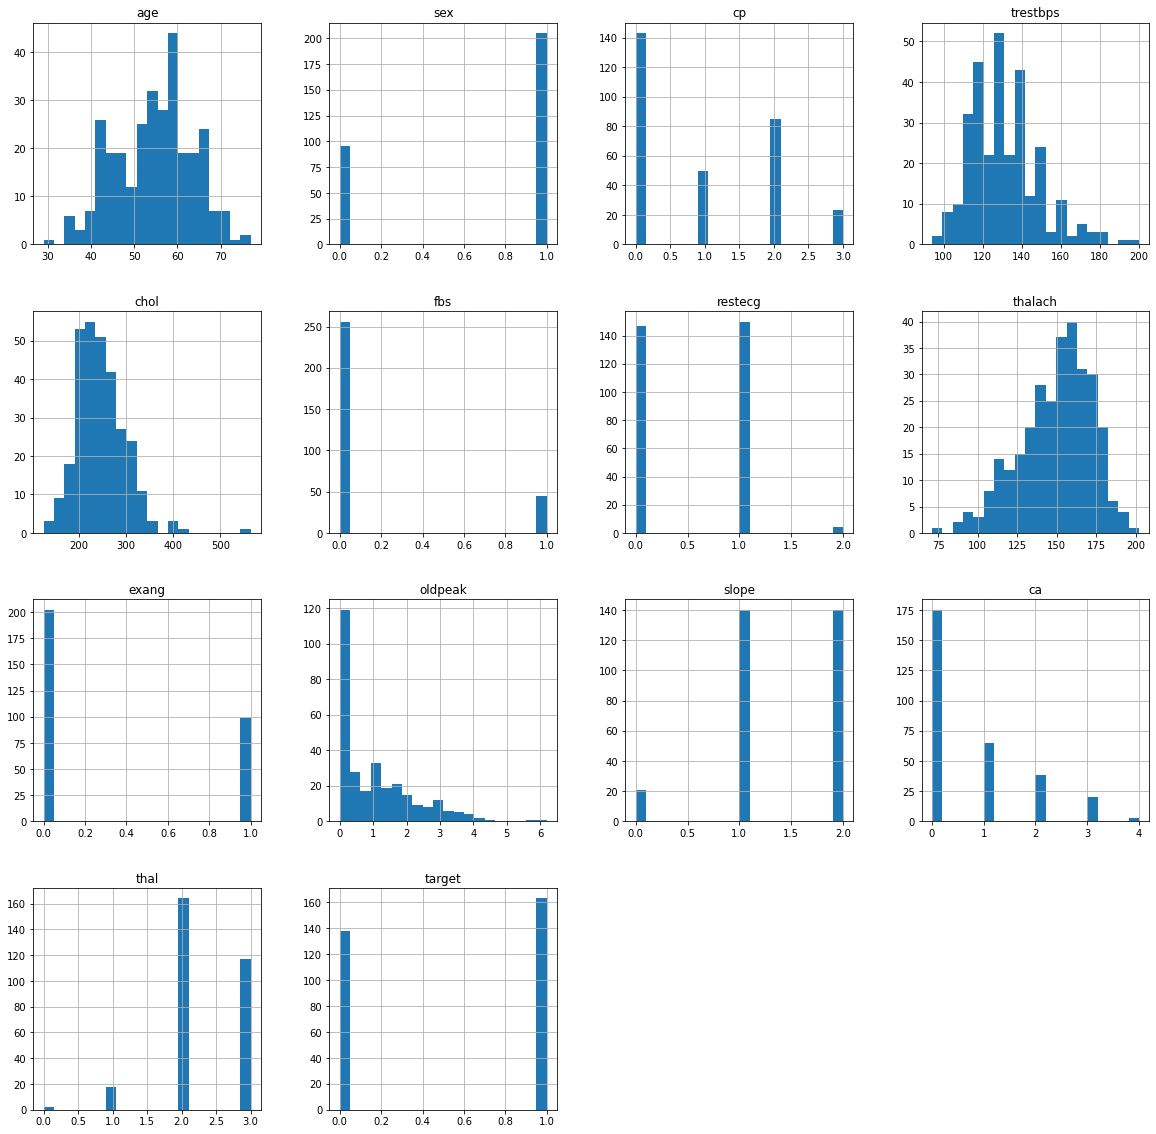

In [14]:
# View histograms
numeric_cols = df.columns[(df.dtypes == 'int64')|(df.dtypes == 'float64')]
numeric_cols
df[numeric_cols].hist(bins=20, figsize=(20, 20))

# Bivariate analysis

In [15]:
correlations = df[numeric_cols].corr()
correlations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091413,-0.057444,0.286967,0.200598,0.117647,-0.106877,-0.391884,0.089563,0.201989,-0.159338,0.329651,0.062585,-0.217435
sex,-0.091413,1.000000,-0.054154,-0.058533,-0.193198,0.047021,-0.062528,-0.048886,0.145274,0.100575,-0.035295,0.107661,0.212876,-0.286312
cp,-0.057444,-0.054154,1.000000,0.045353,-0.068390,0.097609,0.038665,0.290939,-0.391579,-0.144122,0.113954,-0.210373,-0.158989,0.430339
trestbps,0.286967,-0.058533,0.045353,1.000000,0.127368,0.178723,-0.116643,-0.049362,0.069444,0.195997,-0.124286,0.097046,0.063535,-0.147620
chol,0.200598,-0.193198,-0.068390,0.127368,1.000000,0.009538,-0.144110,-0.000600,0.061132,0.046159,0.004944,0.104073,0.094791,-0.077575
fbs,0.117647,0.047021,0.097609,0.178723,0.009538,1.000000,-0.081962,-0.005756,0.023784,0.003269,-0.057400,0.152237,-0.033491,-0.025594
restecg,-0.106877,-0.062528,0.038665,-0.116643,-0.144110,-0.081962,1.000000,0.038259,-0.066859,-0.053701,0.087726,-0.094710,-0.008949,0.132491
thalach,-0.391884,-0.048886,0.290939,-0.049362,-0.000600,-0.005756,0.038259,1.000000,-0.375995,-0.340189,0.382697,-0.244208,-0.093364,0.418146
exang,0.089563,0.145274,-0.391579,0.069444,0.061132,0.023784,-0.066859,-0.375995,1.000000,0.285294,-0.254445,0.135480,0.204889,-0.434432
oldpeak,0.201989,0.100575,-0.144122,0.195997,0.046159,0.003269,-0.053701,-0.340189,0.285294,1.000000,-0.575077,0.251136,0.207925,-0.427577


<AxesSubplot:>

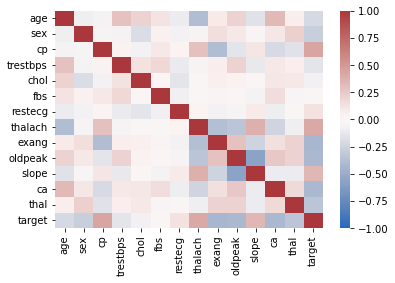

In [16]:
sns.heatmap(correlations, cmap="vlag", vmin=-1, vmax=1)

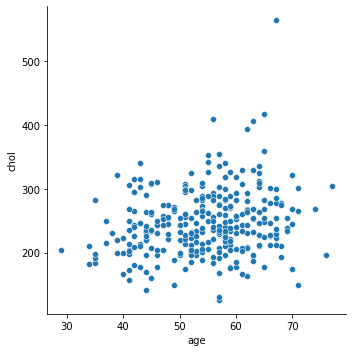

In [17]:
sns.relplot(data=df, x="age", y="chol", kind="scatter")

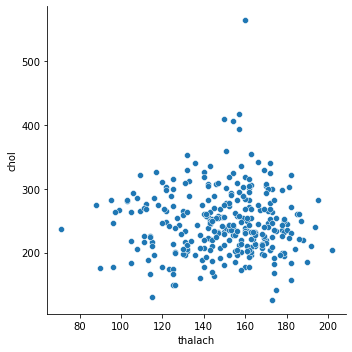

In [18]:
sns.relplot(data=df, x="thalach", y="chol", kind="scatter")

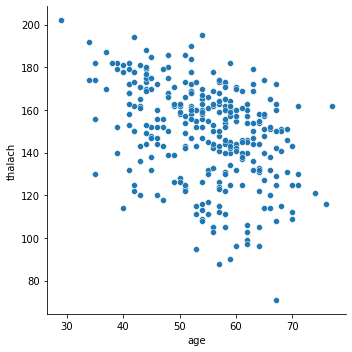

In [19]:
sns.relplot(data=df, x="age", y="thalach", kind="scatter")

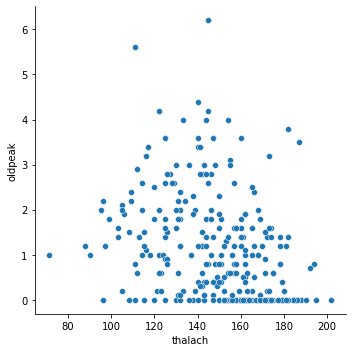

In [20]:
sns.relplot(data=df, y="oldpeak", x="thalach", kind="scatter") #outlier here

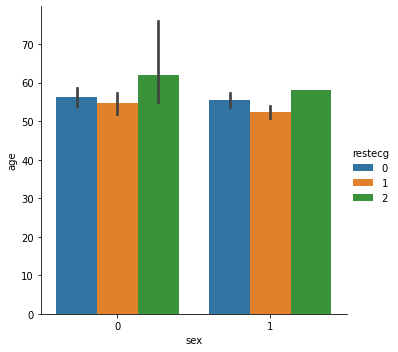

In [21]:
sns.catplot(x="sex", y="age", hue="restecg", data=df, kind="bar")

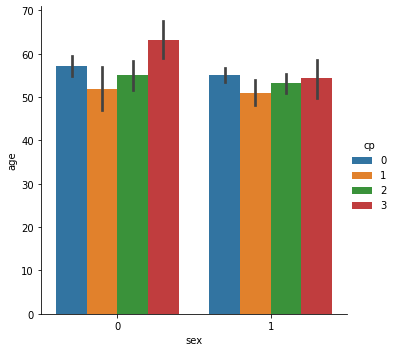

In [22]:
sns.catplot(x="sex", y="age", hue="cp", data=df, kind="bar")

<AxesSubplot:xlabel='oldpeak'>

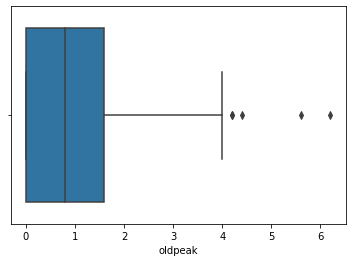

In [23]:
sns.boxplot(x="oldpeak", data=df)

<AxesSubplot:xlabel='age'>

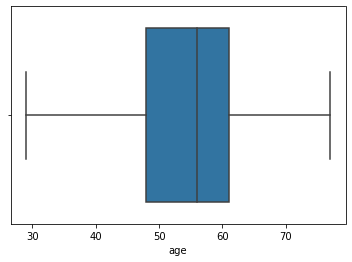

In [24]:
sns.boxplot(x="age", data=df)

In [34]:
X = df.drop(columns=['target','age','sex','exang', 'oldpeak', 'slope','thal']) 
y = df['target']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Logistic Regression

In [44]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = precision_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.9111111111111111
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        40
           1       0.91      0.80      0.85        51

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



# SVM

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
sv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
acc = precision_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.8723404255319149
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.87      0.80      0.84        51

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
acc = precision_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.8181818181818182
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        40
           1       0.82      0.71      0.76        51

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91

